# Description

The purpose of the notebook is to create a standardized way of analyzing datasets with basic machine learning techniques. 

All imports are done under imports. 

The class DataAnalysis is created below with built-in functions for quick analyzing. 

For more comprehensive data analysis, some of the functions can be copied, though one is best of preparing another notebook with more extensive cleaning, feature engineering, hyperparameter tuning, more models and deeper models.

For Time Series, different variations of a network of RNNs and variations of LSTMs will be trained. In this notebook, 2 datasets are analyzed.

_________________________________

# IMPORTS

In [1]:
import os
#os.chdir('data')
import pandas as pd
import numpy as np
from datetime import datetime
from statsmodels.tsa.stattools import adfuller

# Plotting
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Network
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM
from tensorflow.keras import layers

C:\Users\brosb\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


# DATA

In [2]:
# DataAnalysis class. 
# For time series: x is dates, and y is the target column. Ensure that the date is properly set up in a datetime format
class DataAnalysis:
    '''
    The DataAnalysis class is used for objectives such as: 'Time Series', 'Classification' and 'Regression.' 
    '''
    
    def __init__(self, objective, df, x, y):
        
        '''
        To instantizate the class to an object, the objective must be defined, the dataframe must be loaded, and X and y 
        must be assigned. The info of the dataframe and a graph of the y variable against the index will be plotted.
        '''
        
        # Define objective 
        self.objective = objective
        print('The objective of the analysis is: ', objective)
        print('------------------------------------------------------------------------------')
        
        
        
        if self.objective.lower() == 'time series':
            print('The workflow for Time Series is following:\n')
            
            print('Step 0: Set variables.')
            print('Consider whether to train on entire dataset or subset')
            print('Consider the dates to test\n')
            
            print('Step 1: Check that the data is clean.')
            print('1.1. Look at the chart, are there big holes?')
            print('1.2. Use the function: DataAnalysis.identify_clean_time_series()')
            print('1.3. If the data is not clean, run DataAnalysis.clean_time_series_interpolate()')
            print('1.4. If the data is still not clean, this should be handled manually\n')
            
            print('Step 2: EDA')
            print('Step 2.1. Run DataAnalysis.plot_first_dates(), DataAnalysis.plot_last_dates()')
            print('2.2. Run DataAnalysis.decompose_time_series(), DataAnalysis.check_stationarity()')
            print('2.3. Plot ACF and PACF through statsmodels\n')
            
            print('Step 3: Forecasting')
            print('Step 3.1. Create model')
            print('Step 3.1.1. Split train and test data DataAnalysis.train_test_split_time_series()')
            print('Step 3.1.2. Split X and y data DataAnalysis.train_test_split_time_series()')
            print('Step 3.1.3. Create model with DataAnalysis.make_network_for_timeseries()\n')
            
            print('Step 3.2. Predict')
            print('Step 3.2.1. Run DataAnalysis.predict_time_series()\n')
            
            print('Step 3.3. Plot')
            print('Step 3.3.1. Run DataAnalysis.plot_time_series_predictions(test_X, test_y, y_preds, test_dates = test_dates\n)')
        
            print('------------------------------------------------------------------------------')
            
        
            # Assign dataframe 
            if isinstance(df, pd.DataFrame):
                self.df = df
                print('This is the DataFrame to be analyzed: ')
                display(df.head())
            elif isinstance(df, str):
                self.df = pd.read_csv(df) 
                print('The DataFrame to be analyzed is: ', df)
            else:
                print('Error, not appropriate input. Input should either be Pandas Dataframe or name of file')

            print('------------------------------------------------------------------------------')

            # Define x and y 
            self.x = self.df[x]
            self.y = self.df[y]

            # Info
            print('This is the info of the dataframe \n')
            print(self.df.info(), '\n');
            print('------------------------------------------------------------------------------')


            # Plot y against index
            print('This is the plot of the Y variable with the index\n')
            plt.rcParams["figure.figsize"] = (20,3)
            self.y.plot()
            plt.show()

            # Time series components
            if self.objective == 'Time Series':
                print('Remember to consider: ')
                print('Does the series contain trend, seasonality or clear noise?')
                print('Does the series seem additivie, multiplicative or psuedo-additive?')
                print('Is the series stationary? Consider constant mean, constant variance, constant autocorrelation and periodic components')
        
        
    # Decomposing time series into trend, seasonality and residual 
    def decompose_time_series(self, decompose_series):
        '''
        The only argument needed is the series to be decomposed 
        '''
        self.decompose_series = decompose_series
        
        # Decompose
        ss_decomposition = seasonal_decompose(x=self.decompose_series)
        estimated_trend = ss_decomposition.trend
        estimated_seasonal = ss_decomposition.seasonal
        estimated_residual = ss_decomposition.resid

        # Plot
        plt.plot(estimated_trend)
        plt.title('Estimated trend')
        plt.show()
        plt.plot(estimated_seasonal, label = 'Estimated ')
        plt.title('Estimated seasonality')
        plt.show()
        plt.plot(estimated_residual)
        plt.title('Estimated residual')
        plt.show()
    
    # Identify whether the time series is clean
    def identify_clean_time_series(self, x, y):
        '''
        The time series is deemed clean if there are no null values.
        '''
        if self.df[y].isnull().sum() > 0:
            print('Y variable needs to be cleaned. It contains NaN values')
            print('The number of NaN values is: ', self.df[y].isnull().sum())
            print('--------------------------------------------------------')
        else:
            print('Y variable is clean')
    
    
    # Clean time series by interpolating 
    def clean_time_series_interpolate(self, y):
        '''
        The time series column will be interpolated, but if there are more missing values, it needs to be done manually.
        In the future, if certain usual problems occur, these should be incorporated.
        '''
        if self.df[y].isnull().sum() > 0:
            self.df[y] = self.df[y].interpolate()
            print('The data has been interpolated. Number of NaN values is: ', self.df[y].isnull().sum())
            
            if self.df[y].isnull().sum() > 0:
                print('It is still not clean, this needs special help. The number of NaN values is: ', 
                      self.df[y].isnull().sum())
            else:
                print('This series is clean')
        else:
            print('This series is clean')
            
    # Stationarity 
    def check_stationarity(self, df):
        '''
        Stationarity is important for certain time series models. Deep learning models can usually handle
        non-stationary data, however.
        '''
        print('The series can be assesed to be stationary with the help of histogram and Dickey-Fuller test')
        df.hist()
        plt.title('Distribution of data')
        plt.show()
        
        self.adf, self.pvalue, self.usedlag, self.nobs, self.critical_values, self.icbest = adfuller(df)
        print('The Dickey-Fuller test for stationarity reveals the following: ')
        print(f'ADF test value: {round(self.adf,2)} | P-value {self.pvalue}')
        
        print('----------------------------------------------------------------------')
        print('If stationarity is tested at a p-value of 0.05, ')
        if self.pvalue < 0.05:
            print('the series is stationary')
        elif self.pvalue > 0.05:
            print('the series is non-stationary')
        else:
            print('Something went wrong')
            
            
    # Get first dates for a time series.
    def get_first_dates(self, df, column, n_units):
        return self.df[column][:-n_units]
    
    # Plot the first dates 
    def plot_first_dates(self, df, column, n_units):
        print(f'This is the dates without the last {n_units} dates of {column}')
        self.get_first_dates(df, column,n_units).plot()
        plt.title(f'{column}')
        
    # Get last dates, useful for big datasets     
    def get_last_dates(self, df, column, n_units):
        return self.df[column][-n_units:]
    
    # Plotting last dates, always important to inspect the data 
    def plot_last_dates(self, df, column, n_units):
        print(f'This is the last {n_units} dates of {column}')
        self.get_last_dates(df, column,n_units).plot()
        plt.title(f'{column}')
    
    #HERE
    # TRAIN TEST SPLITTING 
    def train_test_split_time_series(self, df, y, test_dates, subset = False, subset_start = 0):
        
        '''
        The dataset is split into a train and test set. Subset can be set to True and a subset start can be specified
        for larger datasets. 
        '''
    
        # Split into first and last dates depeding on specified test_dates
        self.train = self.get_first_dates(self.df, y, test_dates)
        self.test = self.get_last_dates(self.df, y, test_dates)
        
        # Able to decrease size of data
        if subset == True:
            self.train = self.train[subset_start:]
        else:
            pass 
        
        print('The shape of the train set is: ', self.train.shape)
        print('The shape of the test set is: ', self.test.shape)
        
        #Return train and test
        return self.train, self.test
    
    # Splitting train and test into X and y
    def X_y_split_time_series(self, train, test, len_of_sequence, features = 1):
        self.train_X = []
        self.train_y = []
        
        for i in range(0, train.shape[0]-len_of_sequence):
            self.train_X.append(train[i:i+len_of_sequence])
            self.train_y.append(train[i+len_of_sequence])
        
        # Train X
        self.train_X = np.array(self.train_X)
        self.train_X = self.train_X.reshape(self.train_X.shape[0],self.train_X.shape[1],features)
        
        # Train y
        self.train_y = np.array(self.train_y)
        
        # Tests
        self.test_X = np.array(test[:len_of_sequence])
        self.test_y = np.array(test[len_of_sequence:])
        
        # Info
        print('The shape of train_X is: ', self.train_X.shape)
        print('The shape of train_y is: ', self.train_y.shape)
        print('The shape of test_X is: ', self.test_X.shape)
        print('The shape of test_y is: ', self.test_y.shape)
        
        
        return self.train_X, self.train_y, self.test_X, self.test_y
        
        
    # TIMESERIES------------------------------------------------------------------------------------------------------
    # CREATING THE NETWORK, timeseries 
    def make_network_for_timeseries(self, train_X, train_y, n_cells, epochs, cell1 = SimpleRNN, features = 1, 
                                    batch_size = 64, verbose = 1,
                                    loss='mean_squared_error', optimizer = 'adam'):
        
        # Initialize network object
        self.network = Sequential()
        
        # Make first hidden state
        self.network.add(cell1(n_cells, input_shape = (train_X.shape[1], features)))
        
        # Add output layer
        self.network.add(Dense(1))
        
        # Compile and fit
        self.network.compile(loss=loss, optimizer=optimizer)
        self.network.fit(train_X, train_y, epochs = epochs, batch_size = batch_size, verbose = verbose)
        
        return self.network
    
    # PREDICTING, time series 
    def predict_time_series(self, network, test_X, test_y):
        self.test_X_copy = test_X.copy().reshape(1,-1,1)
        self.y_pred = []
        
        # Make predictions
        for _ in range(len(test_y)):
            self.pred = network.predict(self.test_X_copy)
            self.y_pred.append(self.pred)
            
            # Include new predictions as the last value and remove the first (for future, could make deque)
            self.test_X_copy[:, :-1, :] = self.test_X_copy[:, 1:, :]
            self.test_X_copy[:, -1, :] = self.pred 
        
        self.preds = np.array(self.y_pred).reshape(-1,1)
            
        return self.preds 
    
    
    # PLOTTING PREDICTIONS, time series 
    def plot_time_series_predictions(self, test_X, test_y, y_preds, test_dates):
        # Range
        start_range = range(1, test_X.shape[0]+1)
        predict_range = range(test_X.shape[0], test_dates)
        
        # Plotting
        plt.plot(start_range, test_X)
        plt.plot(predict_range, test_y, color = 'orange')
        plt.plot(predict_range, y_preds, color = 'teal', linestyle = '--')
        
        # Title and legend
        plt.title('Test data and predictions')
        plt.legend(['Initial Series','Target Series','Predictions'])
 

_____________________________________________________________

# Sunspots

# 1. Variables and data

The objective of the analysis is:  Time Series
------------------------------------------------------------------------------
The workflow for Time Series is following:

Step 0: Set variables.
Consider whether to train on entire dataset or subset
Consider the dates to test

Step 1: Check that the data is clean.
1.1. Look at the chart, are there big holes?
1.2. Use the function: DataAnalysis.identify_clean_time_series()
1.3. If the data is not clean, run DataAnalysis.clean_time_series_interpolate()
1.4. If the data is still not clean, this should be handled manually

Step 2: EDA
Step 2.1. Run DataAnalysis.plot_first_dates(), DataAnalysis.plot_last_dates()
2.2. Run DataAnalysis.decompose_time_series(), DataAnalysis.check_stationarity()
2.3. Plot ACF and PACF through statsmodels

Step 3: Forecasting
Step 3.1. Create model
Step 3.1.1. Split train and test data DataAnalysis.train_test_split_time_series()
Step 3.1.2. Split X and y data DataAnalysis.train_test_split_time_series()
Step 3.1.3. 

,Month,Sunspots
Month,,
1749-01-01,1749-01,58.0
1749-02-01,1749-02,62.6
1749-03-01,1749-03,70.0
1749-04-01,1749-04,55.7
1749-05-01,1749-05,85.0


------------------------------------------------------------------------------
This is the info of the dataframe 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2820 entries, 1749-01-01 to 1983-12-01
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Month     2820 non-null   object 
 1   Sunspots  2820 non-null   float64
dtypes: float64(1), object(1)
memory usage: 66.1+ KB
None 

------------------------------------------------------------------------------
This is the plot of the Y variable with the index



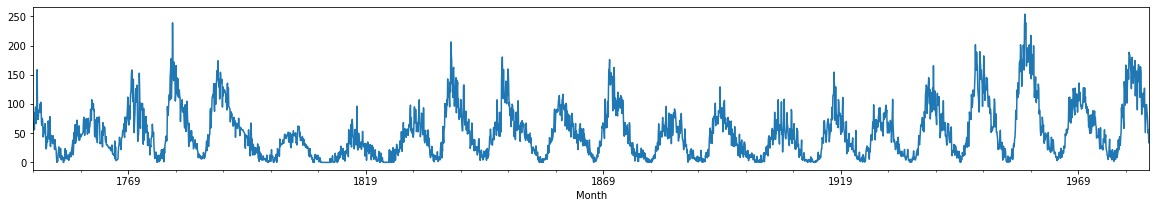

Remember to consider: 
Does the series contain trend, seasonality or clear noise?
Does the series seem additivie, multiplicative or psuedo-additive?
Is the series stationary? Consider constant mean, constant variance, constant autocorrelation and periodic components


In [5]:
# Define variables 
# Objective 
objective = 'Time Series'

# Dataframe
df = pd.read_csv('data/monthly-sunspots.csv')

# Specific for Sunspots dataframe 
df.set_index(pd.to_datetime(df['Month']), inplace=True)

# Define x
x = 'Month'

# Define y 
y = 'Sunspots'

# Interested in testing last 24 days 
test_dates = 24

# Length of sequence (for the current dataset, it would be interesting to forecast a year in advance)
len_of_sequence = 12

# Create object of DataAnalysis class
model = DataAnalysis(objective, df, x, y)

In [6]:
# Check clean
print(model.df.isna().sum())
print('')

# Check if needs to be cleaned
model.identify_clean_time_series(x,y)

# Clean
model.clean_time_series_interpolate(y)

Month       0
Sunspots    0
dtype: int64

Y variable is clean
This series is clean


# 2. EDA

This is the last 24 dates of Sunspots


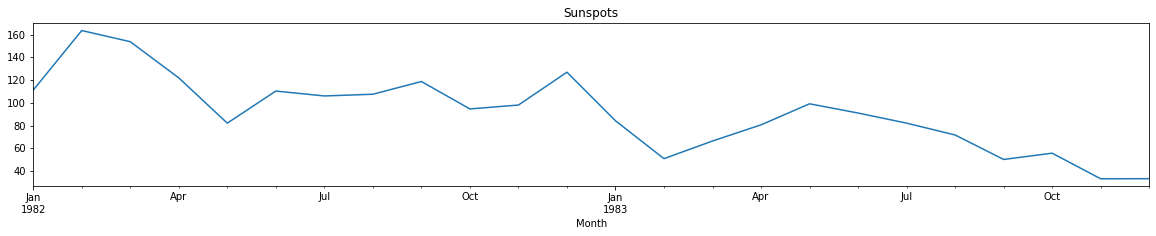

In [7]:
# Lets take a look at the last year 
model.get_last_dates(df, 'Sunspots', 24)
model.plot_last_dates(df, 'Sunspots', 24)

This is the dates without the last 12 dates of Sunspots


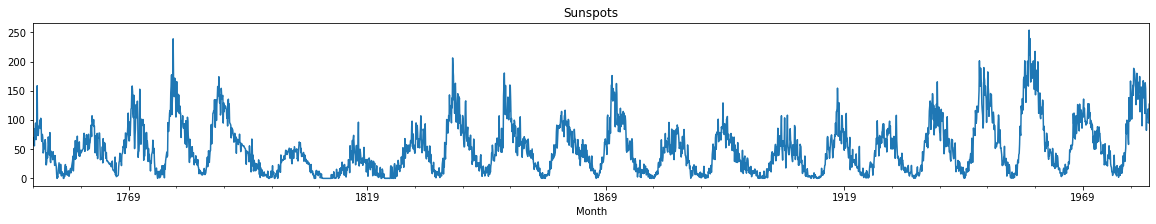

In [8]:
# And the first years
model.get_first_dates(df, 'Sunspots', 12)
model.plot_first_dates(df, 'Sunspots', 12)

### Decomposition

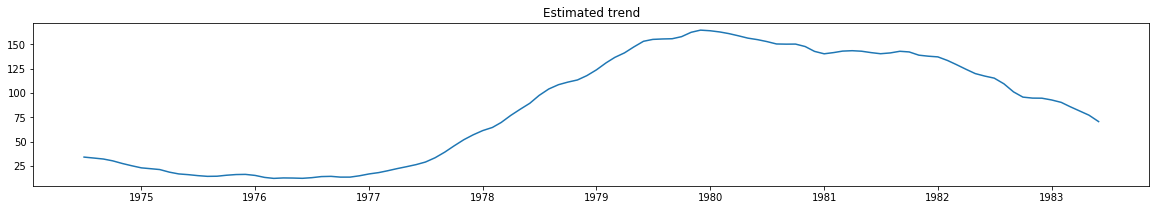

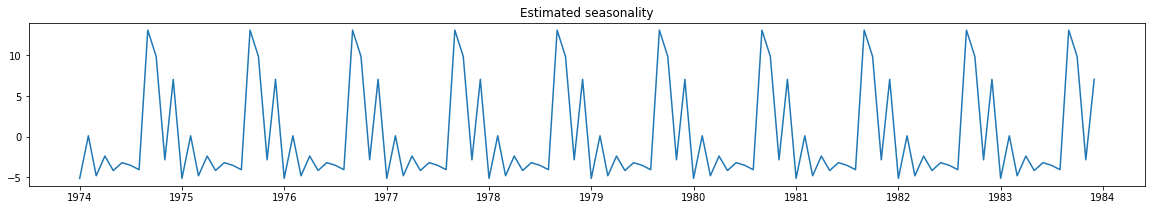

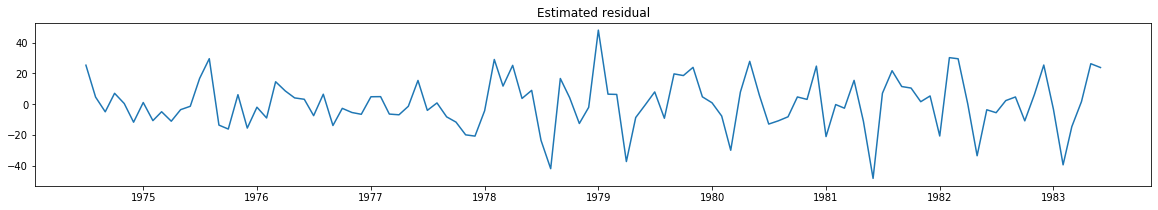

In [9]:
last = model.get_last_dates(model.df, y, 120)
model.decompose_time_series(last)

### Stationarity

The series can be assesed to be stationary with the help of histogram and Dickey-Fuller test


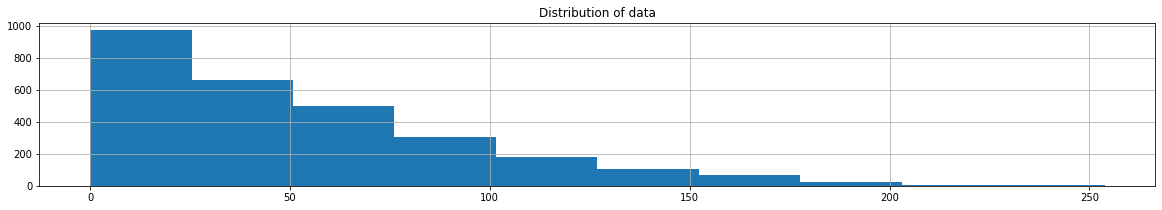

The Dickey-Fuller test for stationarity reveals the following: 
ADF test value: -9.57 | P-value 2.333452143866187e-16
----------------------------------------------------------------------
If stationarity is tested at a p-value of 0.05, 
the series is stationary


In [10]:
model.check_stationarity(model.df[y])

### ACF and PACF

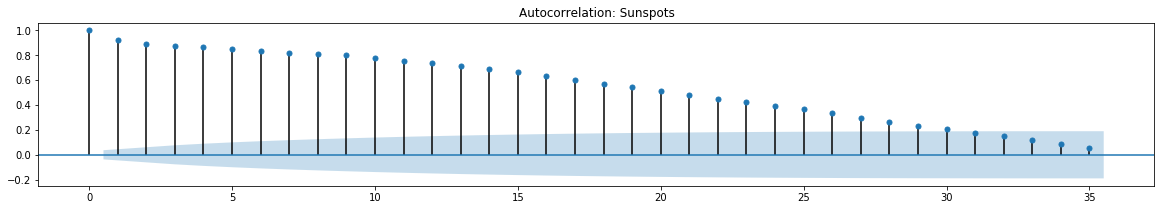

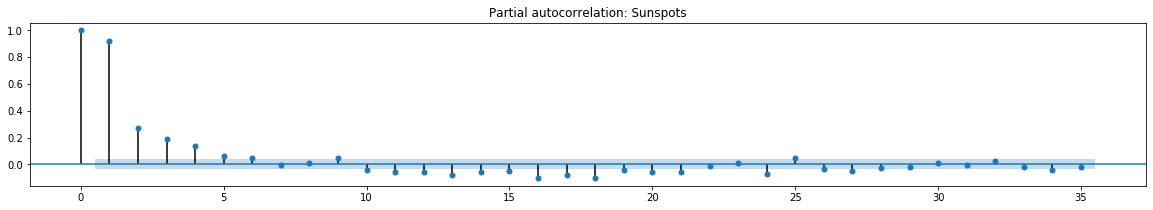

In [11]:
# ACF
plot_acf(model.df[y], title = f'Autocorrelation: {y}', lags = 35);

# PACF 
plot_pacf(model.df[y], title = f'Partial autocorrelation: {y}', lags = 35);

Comment: The data is highly correlated with past values. Even values 30 steps back

# 3. Forecasting

In [12]:
# Train-test 
train, test = model.train_test_split_time_series(df, y, test_dates, subset = True, subset_start = 2000)

The shape of the train set is:  (796,)
The shape of the test set is:  (24,)


In [13]:
# X and y split 
train_X, train_y, test_X, test_y = model.X_y_split_time_series(train, test, len_of_sequence, features = 1)

The shape of train_X is:  (784, 12, 1)
The shape of train_y is:  (784,)
The shape of test_X is:  (12,)
The shape of test_y is:  (12,)


## 3.1 Create model

In [14]:
epochs = 10
n_cells = 10

network = model.make_network_for_timeseries(train_X, train_y, n_cells, epochs, features = 1, 
                                    batch_size = 64, verbose = 1,
                                    loss='mean_squared_error', optimizer = 'adam')

Epoch 1/10
784/784 [==============================] - 0s 305us/step - loss: 7084.8552
Epoch 2/10
784/784 [==============================] - 0s 65us/step - loss: 7065.5885
Epoch 3/10
784/784 [==============================] - 0s 59us/step - loss: 7045.7434
Epoch 4/10
784/784 [==============================] - 0s 60us/step - loss: 7026.0557
Epoch 5/10
784/784 [==============================] - 0s 61us/step - loss: 7004.0571
Epoch 6/10
784/784 [==============================] - 0s 62us/step - loss: 6971.6790
Epoch 7/10
784/784 [==============================] - 0s 54us/step - loss: 6911.5652
Epoch 8/10
784/784 [==============================] - 0s 60us/step - loss: 6888.8699
Epoch 9/10
784/784 [==============================] - 0s 59us/step - loss: 6870.7348
Epoch 10/10
784/784 [==============================] - 0s 62us/step - loss: 6852.6383


## 3.2 Predict

In [15]:
y_preds = model.predict_time_series(network, test_X, test_y)

## 3.3 Plot

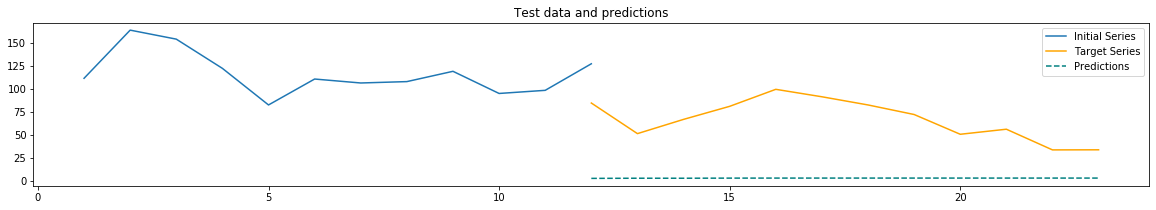

In [16]:
model.plot_time_series_predictions(test_X, test_y, y_preds, test_dates = test_dates)

Comment: The model clearly underfits

# Lets see some results

In [17]:
# Defining function to evaluate model 
def calc_MSE(test_y, y_preds):
    assert test_y.shape == y_preds.shape
    error = (test_y - y_preds).sum()
    sq_error = error**2
    mse = sq_error / len(test_y)
    
    return mse 

# SimpleRNN

Following combination is finished: 
Cell units = 10 | epochs = 50
Mean Squared Error for this combination is :  50204.95


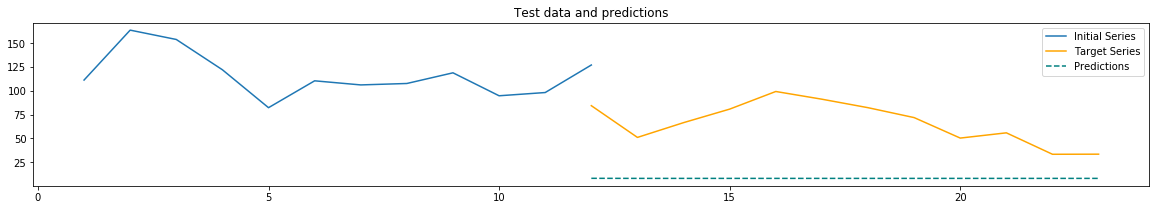

Following combination is finished: 
Cell units = 30 | epochs = 50
Mean Squared Error for this combination is :  41261.56


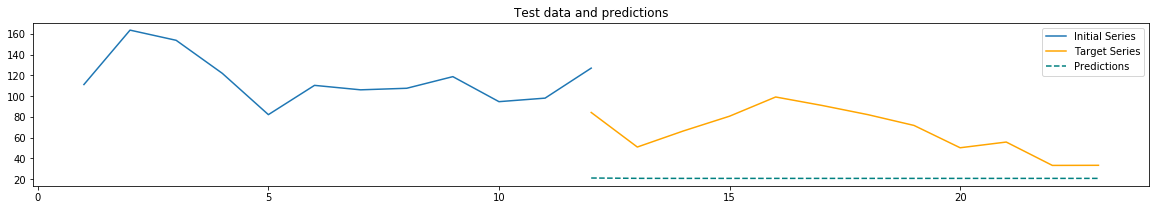

Following combination is finished: 
Cell units = 10 | epochs = 100
Mean Squared Error for this combination is :  25171.13


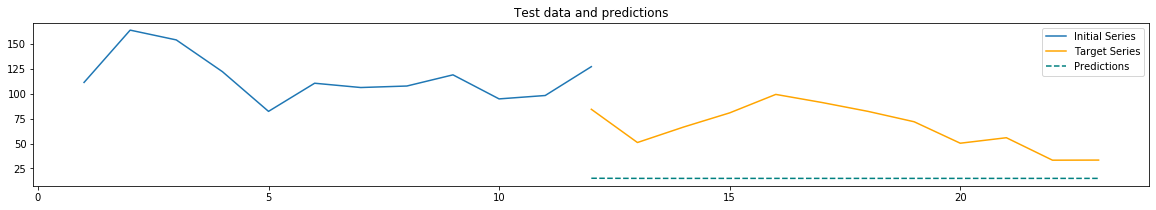

Following combination is finished: 
Cell units = 30 | epochs = 100
Mean Squared Error for this combination is :  31904.83


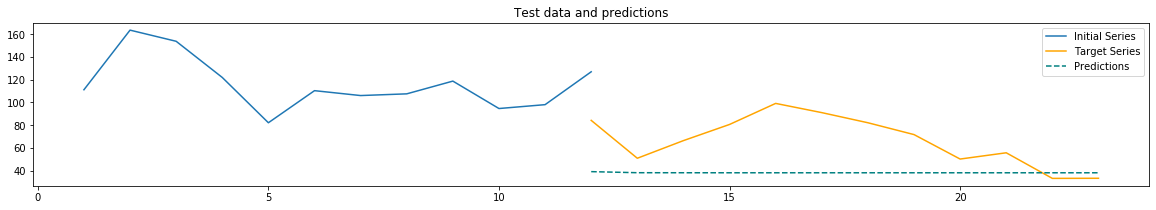

In [428]:
epoch_list = [50,100]
cell_units = [10,30]

for i in epoch_list:
    for j in cell_units:
        print('Following combination is finished: ')
        print(f'Cell units = {j} | epochs = {i}')
        MSE = calc_MSE(test_y, y_preds.reshape(12))
        print('Mean Squared Error for this combination is : ', round(MSE, 2))
        # Create model
        network = model.make_network_for_timeseries(train_X, train_y, n_cells=j, epochs=i, features = 1, 
                                    batch_size = 64, verbose = 0,
                                    loss='mean_squared_error', optimizer = 'adam')
        # Predict
        y_preds = model.predict_time_series(network, test_X, test_y)
        
        # Plotting
        model.plot_time_series_predictions(test_X, test_y, y_preds, test_dates = test_dates)
        
        plt.show() 

# LSTM

Following combination is finished: 
Cell units = 20 | epochs = 100
Mean Squared Error for this combination is :  18851.01


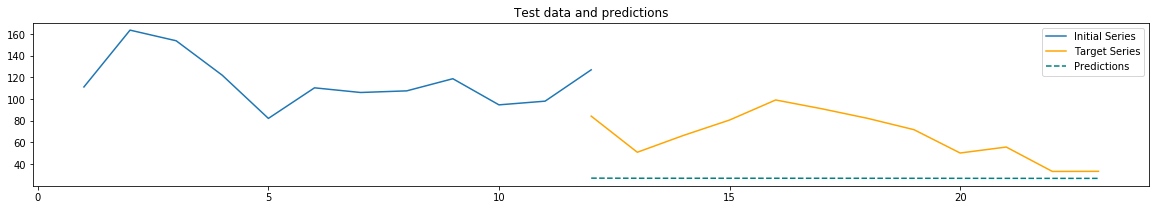

Following combination is finished: 
Cell units = 50 | epochs = 100
Mean Squared Error for this combination is :  461.38


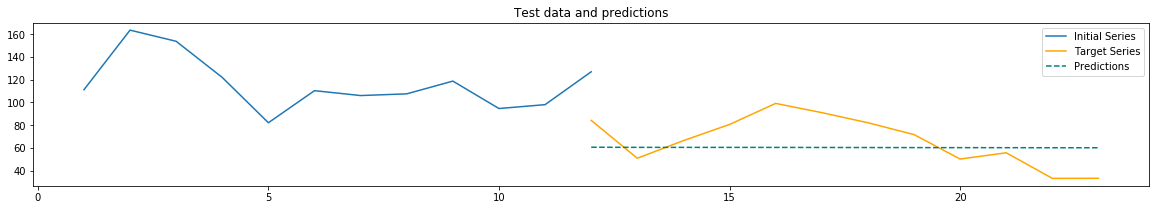

Following combination is finished: 
Cell units = 100 | epochs = 100
Mean Squared Error for this combination is :  5797.01


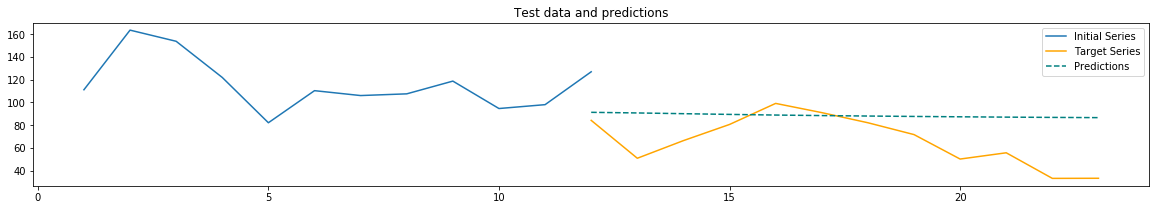

Following combination is finished: 
Cell units = 20 | epochs = 1000
Mean Squared Error for this combination is :  31258.48


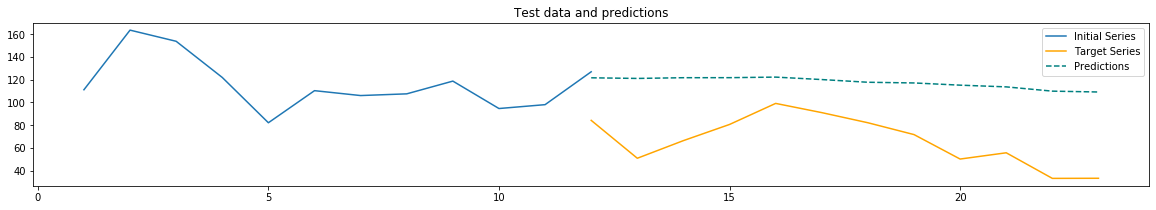

Following combination is finished: 
Cell units = 50 | epochs = 1000
Mean Squared Error for this combination is :  7774.42


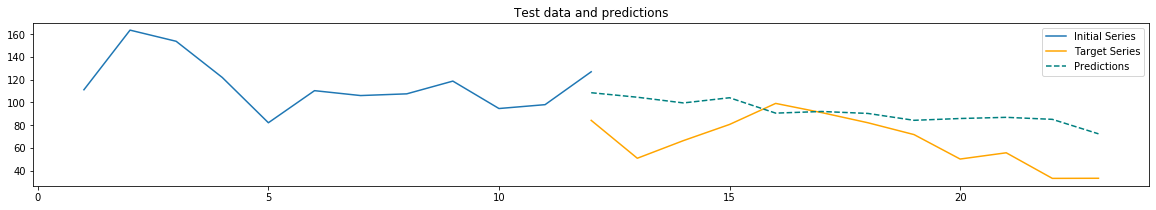

Following combination is finished: 
Cell units = 100 | epochs = 1000
Mean Squared Error for this combination is :  2286.61


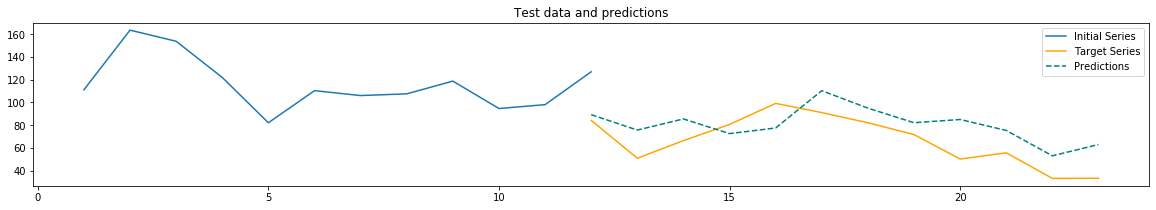

Following combination is finished: 
Cell units = 20 | epochs = 5000
Mean Squared Error for this combination is :  12373.57


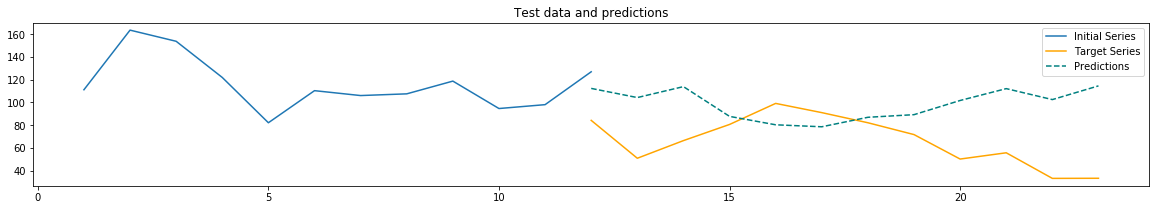

Following combination is finished: 
Cell units = 50 | epochs = 5000
Mean Squared Error for this combination is :  18210.67


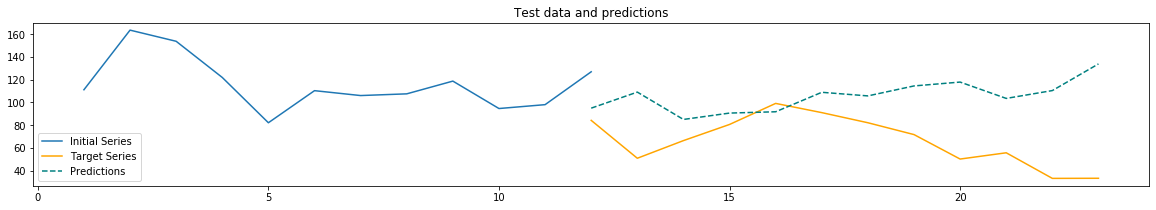

Following combination is finished: 
Cell units = 100 | epochs = 5000
Mean Squared Error for this combination is :  1448.43


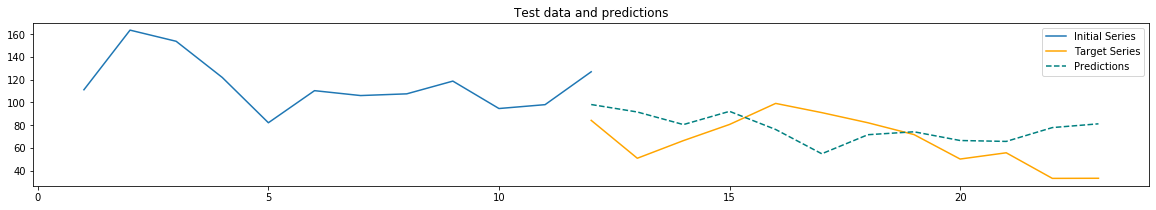

In [431]:
epoch_list = [100, 1000, 5000]
cell_units = [20,50, 100]

for i in epoch_list:
    for j in cell_units:
        print('Following combination is finished: ')
        print(f'Cell units = {j} | epochs = {i}')
        
        # Create model
        network = model.make_network_for_timeseries(train_X, train_y, cell1 = LSTM, n_cells=j, epochs=i, features = 1, 
                                    batch_size = 64, verbose = 0,
                                    loss='mean_squared_error', optimizer = 'adam')
        # Predict
        y_preds = model.predict_time_series(network, test_X, test_y)
        
        # Performance 
        MSE = calc_MSE(test_y, y_preds.reshape(12))
        print('Mean Squared Error for this combination is : ', round(MSE, 2))
        
        # Plotting
        model.plot_time_series_predictions(test_X, test_y, y_preds, test_dates = test_dates)
        
        plt.show() 

Very interesting to follow the evolution from linear to non-linear pattern detection 

To further improve the model, an additional hidden layer could be added

_________________________________________________________________

# ----------------------------------- New Dataset -----------------------------------

# DATASET 2 - Air quality

In [136]:
df = pd.read_excel('AirQualityUCI/AirQualityUCI.xlsx')
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754,NaN,NaN
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487,NaN,NaN
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239,NaN,NaN
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713,NaN,NaN
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824,NaN,NaN
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864,NaN,NaN
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649,NaN,NaN
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866,NaN,NaN


In [137]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [138]:
X = 'Date'
y = 'PT08.S5(O3)'

The objective of the analysis is:  Time series
------------------------------------------------------------------------------
The workflow for Time Series is following:

Step 0: Set variables.
Consider whether to train on entire dataset or subset
Consider the dates to test

Step 1: Check that the data is clean.
1.1. Look at the chart, are there big holes?
1.2. Use the function: DataAnalysis.identify_clean_time_series()
1.3. If the data is not clean, run DataAnalysis.clean_time_series_interpolate()
1.4. If the data is still not clean, this should be handled manually

Step 2: EDA
Step 2.1. Run DataAnalysis.plot_first_dates(), DataAnalysis.plot_last_dates()
2.2. Run DataAnalysis.decompose_time_series(), DataAnalysis.check_stationarity()
2.3. Plot ACF and PACF through statsmodels

Step 3: Forecasting
Step 3.1. Create model
Step 3.1.1. Split train and test data DataAnalysis.train_test_split_time_series()
Step 3.1.2. Split X and y data DataAnalysis.train_test_split_time_series()
Step 3.1.3. 

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,NaN,NaN
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,NaN,NaN
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,NaN,NaN
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,NaN,NaN
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,NaN,NaN


------------------------------------------------------------------------------
This is the info of the dataframe 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH      

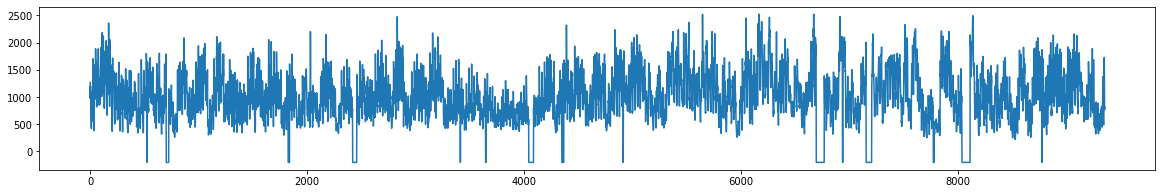

In [139]:
model = DataAnalysis('Time series', df, X, y, )

## Comment: The date column was split in hour and y/m/d, so I had to take detour to fix this

In [150]:
df['Date'][0].year

2004

In [151]:
df['Date'][0].month

3

In [161]:
df['Date'][0].day

10

In [163]:
df['Time'][0].hour

18

In [179]:
year_list = []
month_list = []
day_list = []
hour_list = []

i = 0 

for i in range(0,len(df)):
    year_list.append(df['Date'][i].year)
    month_list.append(df['Date'][i].month)
    day_list.append(df['Date'][i].day)
    hour_list.append(df['Time'][i].hour)

date_df = pd.DataFrame({'year': year_list,
                       'month':month_list,
                       'day':day_list,
                       'hour':hour_list})

date_col = pd.to_datetime(date_df[['year', 'month', 'day', 'hour']])
df['Date'] = date_col

In [186]:
model.df.set_index('Date', inplace=True)

In [187]:
model.identify_clean_time_series(X, y)

Y variable is clean


# EDA

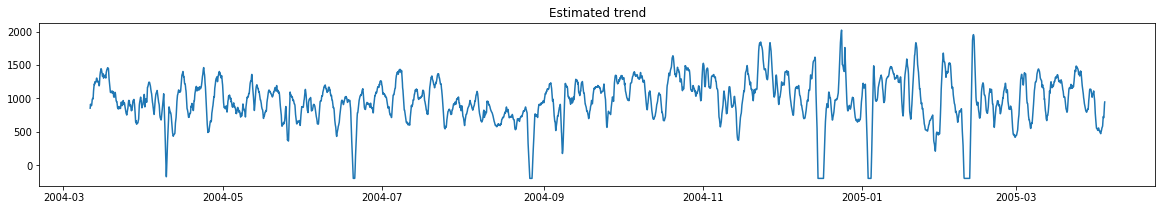

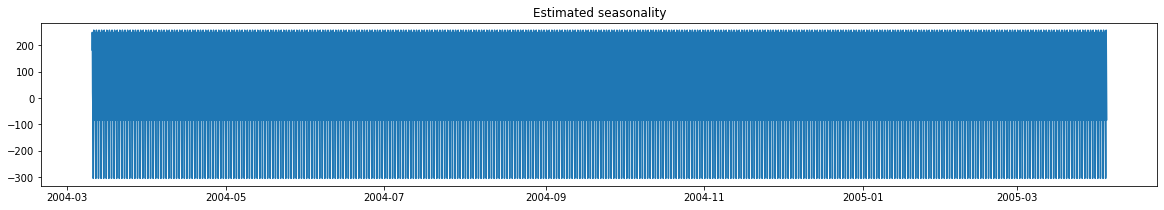

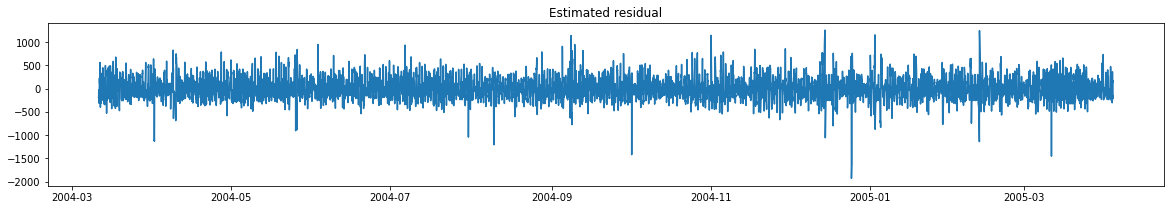

In [188]:
model.decompose_time_series(model.df[y])

This is the dates without the last 76 dates of PT08.S5(O3)


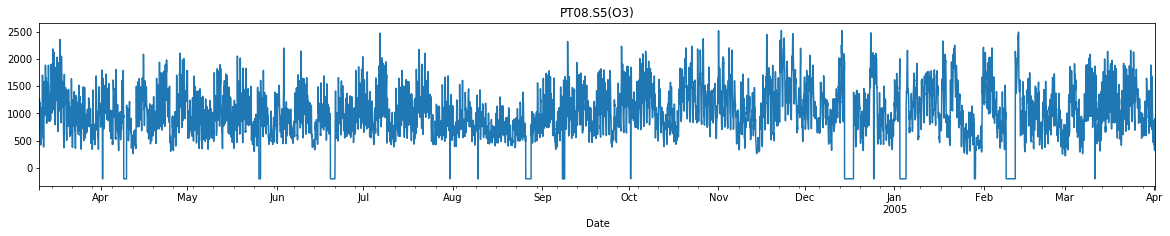

In [201]:
model.plot_first_dates(model.df, y, 76)

This is the last 72 dates of PT08.S5(O3)


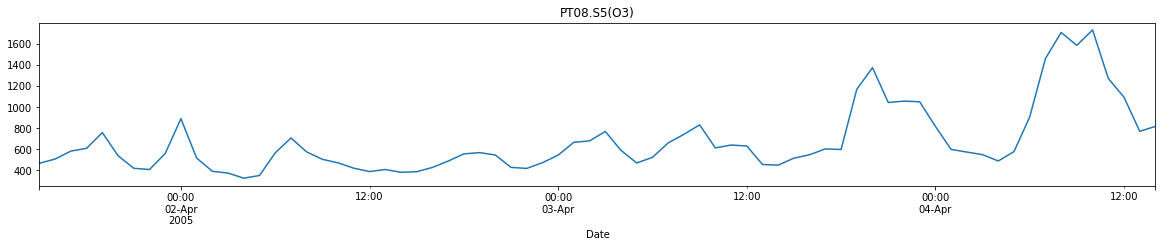

In [212]:
# Looking at last week
model.plot_last_dates(model.df, y, 72)

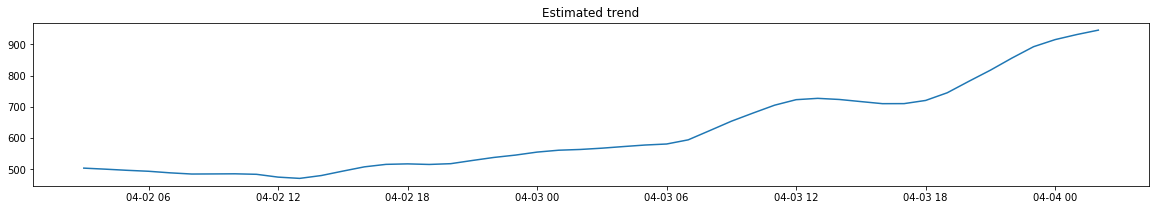

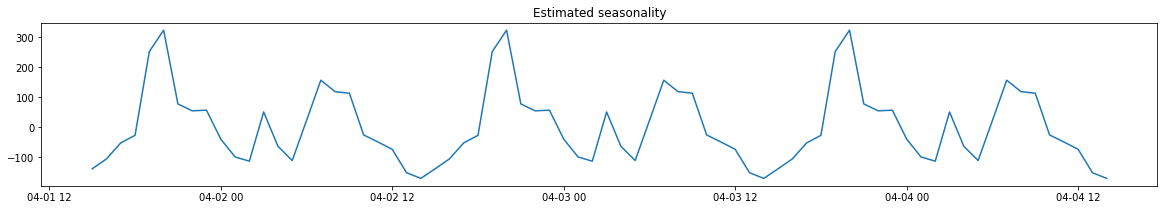

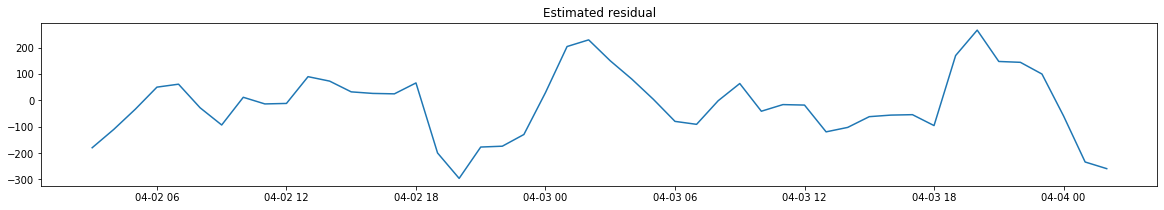

In [213]:
# Looking at last week
model.decompose_time_series(model.get_last_dates(model.df, column = y, n_units = 72))

The series can be assesed to be stationary with the help of histogram and Dickey-Fuller test


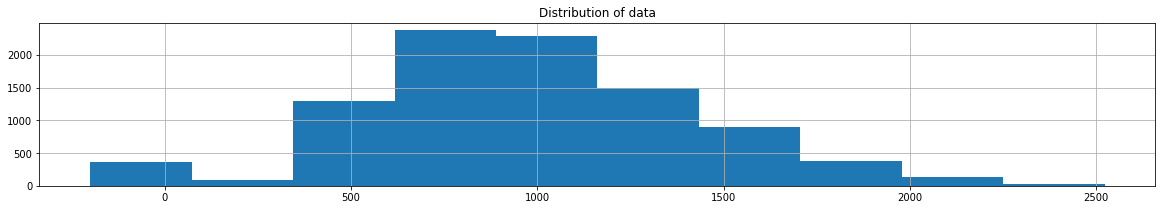

The Dickey-Fuller test for stationarity reveals the following: 
ADF test value: -11.4 | P-value 7.66341074246881e-21
----------------------------------------------------------------------
If stationarity is tested at a p-value of 0.05, 
the series is stationary


In [216]:
# Statonarity
model.check_stationarity(model.df[y])

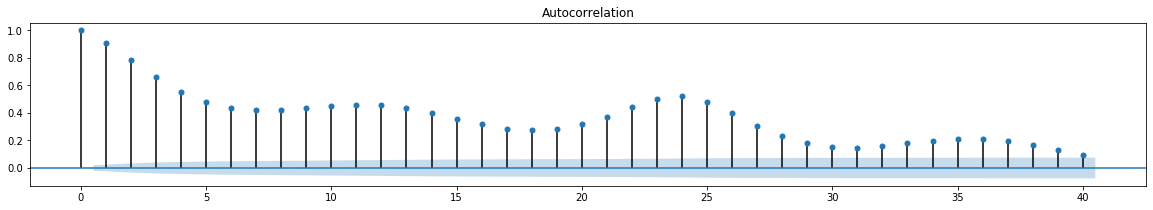

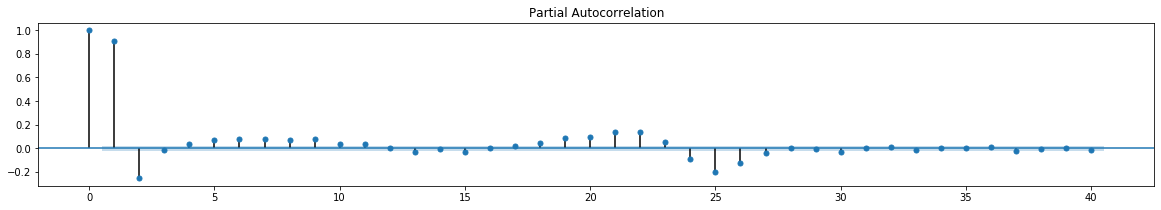

In [219]:
plot_acf(model.df[y])
plot_pacf(model.df[y]);

# Model

In [236]:
test_dates = 24
train, test = model.train_test_split_time_series(model.df, y, test_dates)

The shape of the train set is:  (9333,)
The shape of the test set is:  (24,)


In [237]:
len_of_sequence = 12
train_X, train_y, test_X, test_y = model.X_y_split_time_series(train, test, len_of_sequence)

The shape of train_X is:  (9321, 12, 1)
The shape of train_y is:  (9321,)
The shape of test_X is:  (12,)
The shape of test_y is:  (12,)


# RNN

In [255]:
network1 = model.make_network_for_timeseries(train_X, train_y, 40, 2000)

Epoch 1/2000
9321/9321 [==============================] - 1s 77us/step - loss: 1150604.0101
Epoch 2/2000
9321/9321 [==============================] - 0s 53us/step - loss: 1138301.8738
Epoch 3/2000
9321/9321 [==============================] - 0s 53us/step - loss: 1126741.7718
Epoch 4/2000
9321/9321 [==============================] - 1s 56us/step - loss: 1115282.1003
Epoch 5/2000
9321/9321 [==============================] - 0s 52us/step - loss: 1103924.6836
Epoch 6/2000
9321/9321 [==============================] - 1s 56us/step - loss: 1092666.2277
Epoch 7/2000
9321/9321 [==============================] - 1s 54us/step - loss: 1081502.9549
Epoch 8/2000
9321/9321 [==============================] - 1s 62us/step - loss: 1070429.1754
Epoch 9/2000
9321/9321 [==============================] - 1s 56us/step - loss: 1059451.8573
Epoch 10/2000
9321/9321 [==============================] - 1s 57us/step - loss: 1048564.5098
Epoch 11/2000
9321/9321 [==============================] - 1s 59us/step - loss:

Epoch 177/2000
9321/9321 [==============================] - 0s 49us/step - loss: 187003.8563
Epoch 178/2000
9321/9321 [==============================] - 0s 53us/step - loss: 186678.9947
Epoch 179/2000
9321/9321 [==============================] - 0s 49us/step - loss: 186372.6357
Epoch 180/2000
9321/9321 [==============================] - 0s 50us/step - loss: 186094.7549
Epoch 181/2000
9321/9321 [==============================] - 0s 53us/step - loss: 185848.8725
Epoch 182/2000
9321/9321 [==============================] - 0s 52us/step - loss: 185662.5360
Epoch 183/2000
9321/9321 [==============================] - 0s 52us/step - loss: 185461.1272
Epoch 184/2000
9321/9321 [==============================] - 0s 54us/step - loss: 185277.1817
Epoch 185/2000
9321/9321 [==============================] - 0s 50us/step - loss: 185112.9080
Epoch 186/2000
9321/9321 [==============================] - 1s 69us/step - loss: 185022.3024
Epoch 187/2000
9321/9321 [==============================] - 0s 52us/st

Epoch 265/2000
9321/9321 [==============================] - 0s 49us/step - loss: 183223.5234
Epoch 266/2000
9321/9321 [==============================] - 0s 49us/step - loss: 183209.3710
Epoch 267/2000
9321/9321 [==============================] - 0s 48us/step - loss: 183194.9734
Epoch 268/2000
9321/9321 [==============================] - 0s 48us/step - loss: 183181.6511
Epoch 269/2000
9321/9321 [==============================] - 0s 48us/step - loss: 183168.6854
Epoch 270/2000
9321/9321 [==============================] - 0s 48us/step - loss: 183155.5477
Epoch 271/2000
9321/9321 [==============================] - 0s 51us/step - loss: 183142.3028
Epoch 272/2000
9321/9321 [==============================] - 0s 48us/step - loss: 183128.8794
Epoch 273/2000
9321/9321 [==============================] - 0s 49us/step - loss: 183115.6750
Epoch 274/2000
9321/9321 [==============================] - 0s 48us/step - loss: 183102.3504
Epoch 275/2000
9321/9321 [==============================] - 0s 49us/st

9321/9321 [==============================] - 0s 49us/step - loss: 182075.4480
Epoch 354/2000
9321/9321 [==============================] - 0s 48us/step - loss: 182054.3805
Epoch 355/2000
9321/9321 [==============================] - 0s 50us/step - loss: 182056.8597
Epoch 356/2000
9321/9321 [==============================] - 0s 48us/step - loss: 182029.7724
Epoch 357/2000
9321/9321 [==============================] - 0s 49us/step - loss: 182018.6083
Epoch 358/2000
9321/9321 [==============================] - 0s 48us/step - loss: 182003.7131
Epoch 359/2000
9321/9321 [==============================] - 0s 48us/step - loss: 181990.2849
Epoch 360/2000
9321/9321 [==============================] - 0s 49us/step - loss: 181977.5224
Epoch 361/2000
9321/9321 [==============================] - 0s 49us/step - loss: 181965.7493
Epoch 362/2000
9321/9321 [==============================] - 0s 49us/step - loss: 181952.7831
Epoch 363/2000
9321/9321 [==============================] - 0s 48us/step - loss: 1819

9321/9321 [==============================] - 0s 49us/step - loss: 179866.6170
Epoch 530/2000
9321/9321 [==============================] - 0s 48us/step - loss: 179854.7366
Epoch 531/2000
9321/9321 [==============================] - 0s 49us/step - loss: 179842.9288
Epoch 532/2000
9321/9321 [==============================] - 0s 48us/step - loss: 179830.1713
Epoch 533/2000
9321/9321 [==============================] - 0s 49us/step - loss: 179818.1532
Epoch 534/2000
9321/9321 [==============================] - 0s 48us/step - loss: 179805.4996
Epoch 535/2000
9321/9321 [==============================] - 0s 48us/step - loss: 179794.1589
Epoch 536/2000
9321/9321 [==============================] - 0s 49us/step - loss: 179781.3670
Epoch 537/2000
9321/9321 [==============================] - 0s 49us/step - loss: 179769.3538
Epoch 538/2000
9321/9321 [==============================] - 0s 49us/step - loss: 179757.2182
Epoch 539/2000
9321/9321 [==============================] - 0s 48us/step - loss: 1797

9321/9321 [==============================] - 1s 77us/step - loss: 177832.7393
Epoch 705/2000
9321/9321 [==============================] - 1s 87us/step - loss: 177821.1996
Epoch 706/2000
9321/9321 [==============================] - 1s 63us/step - loss: 177809.3173
Epoch 707/2000
9321/9321 [==============================] - 1s 64us/step - loss: 177798.0907 0s -
Epoch 708/2000
9321/9321 [==============================] - 1s 55us/step - loss: 177787.6610
Epoch 709/2000
9321/9321 [==============================] - 0s 52us/step - loss: 177775.9884
Epoch 710/2000
9321/9321 [==============================] - 1s 54us/step - loss: 177765.2080
Epoch 711/2000
9321/9321 [==============================] - 0s 52us/step - loss: 177754.9591
Epoch 712/2000
9321/9321 [==============================] - 0s 51us/step - loss: 177743.1765
Epoch 713/2000
9321/9321 [==============================] - 0s 49us/step - loss: 177731.3874
Epoch 714/2000
9321/9321 [==============================] - 0s 49us/step - loss:

9321/9321 [==============================] - 1s 61us/step - loss: 176865.4134
Epoch 793/2000
9321/9321 [==============================] - 1s 60us/step - loss: 176851.8915
Epoch 794/2000
9321/9321 [==============================] - 1s 56us/step - loss: 176841.6778
Epoch 795/2000
9321/9321 [==============================] - 1s 67us/step - loss: 176831.6954
Epoch 796/2000
9321/9321 [==============================] - 1s 59us/step - loss: 176820.0643
Epoch 797/2000
9321/9321 [==============================] - 1s 67us/step - loss: 176810.8808
Epoch 798/2000
9321/9321 [==============================] - 1s 64us/step - loss: 176797.8517
Epoch 799/2000
9321/9321 [==============================] - 1s 67us/step - loss: 176788.2336
Epoch 800/2000
9321/9321 [==============================] - 1s 68us/step - loss: 176776.7899
Epoch 801/2000
9321/9321 [==============================] - 0s 51us/step - loss: 176766.7504
Epoch 802/2000
9321/9321 [==============================] - 0s 50us/step - loss: 1767

9321/9321 [==============================] - 0s 53us/step - loss: 175094.0407
Epoch 969/2000
9321/9321 [==============================] - 0s 53us/step - loss: 175083.4915
Epoch 970/2000
9321/9321 [==============================] - 1s 54us/step - loss: 175074.1963
Epoch 971/2000
9321/9321 [==============================] - 1s 55us/step - loss: 175064.9724
Epoch 972/2000
9321/9321 [==============================] - 0s 53us/step - loss: 175054.6242
Epoch 973/2000
9321/9321 [==============================] - 1s 54us/step - loss: 175043.7927
Epoch 974/2000
9321/9321 [==============================] - 0s 53us/step - loss: 175033.4494
Epoch 975/2000
9321/9321 [==============================] - 0s 53us/step - loss: 175022.7245 0s - los
Epoch 976/2000
9321/9321 [==============================] - 0s 52us/step - loss: 175012.6591
Epoch 977/2000
9321/9321 [==============================] - 0s 52us/step - loss: 175003.1884
Epoch 978/2000
9321/9321 [==============================] - 0s 53us/step - l

9321/9321 [==============================] - 1s 68us/step - loss: 173419.7225
Epoch 1143/2000
9321/9321 [==============================] - 1s 58us/step - loss: 173411.4999
Epoch 1144/2000
9321/9321 [==============================] - 0s 50us/step - loss: 173401.7833
Epoch 1145/2000
9321/9321 [==============================] - 1s 54us/step - loss: 173392.9524
Epoch 1146/2000
9321/9321 [==============================] - 0s 50us/step - loss: 173383.7130
Epoch 1147/2000
9321/9321 [==============================] - 0s 53us/step - loss: 173373.4389
Epoch 1148/2000
9321/9321 [==============================] - 0s 49us/step - loss: 173364.8612
Epoch 1149/2000
9321/9321 [==============================] - 0s 52us/step - loss: 173355.4898
Epoch 1150/2000
9321/9321 [==============================] - 1s 58us/step - loss: 173346.9597
Epoch 1151/2000
9321/9321 [==============================] - 0s 51us/step - loss: 173337.2157
Epoch 1152/2000
9321/9321 [==============================] - 0s 51us/step - 

9321/9321 [==============================] - 0s 54us/step - loss: 171879.1875
Epoch 1317/2000
9321/9321 [==============================] - 1s 54us/step - loss: 171874.3321
Epoch 1318/2000
9321/9321 [==============================] - 0s 52us/step - loss: 171862.1445
Epoch 1319/2000
9321/9321 [==============================] - 0s 54us/step - loss: 171854.3166
Epoch 1320/2000
9321/9321 [==============================] - 0s 53us/step - loss: 171844.9496
Epoch 1321/2000
9321/9321 [==============================] - 0s 53us/step - loss: 171837.4186
Epoch 1322/2000
9321/9321 [==============================] - 0s 53us/step - loss: 171827.9625
Epoch 1323/2000
9321/9321 [==============================] - 0s 53us/step - loss: 171819.2088
Epoch 1324/2000
9321/9321 [==============================] - 0s 54us/step - loss: 171811.0990
Epoch 1325/2000
9321/9321 [==============================] - 0s 52us/step - loss: 171802.3013
Epoch 1326/2000
9321/9321 [==============================] - 0s 53us/step - 

9321/9321 [==============================] - 0s 43us/step - loss: 170465.2159
Epoch 1491/2000
9321/9321 [==============================] - 0s 43us/step - loss: 170456.7506
Epoch 1492/2000
9321/9321 [==============================] - 0s 43us/step - loss: 170450.3049
Epoch 1493/2000
9321/9321 [==============================] - 0s 43us/step - loss: 170441.9198
Epoch 1494/2000
9321/9321 [==============================] - 0s 43us/step - loss: 170433.9902
Epoch 1495/2000
9321/9321 [==============================] - 0s 43us/step - loss: 170427.2293
Epoch 1496/2000
9321/9321 [==============================] - 0s 42us/step - loss: 170419.0027
Epoch 1497/2000
9321/9321 [==============================] - 0s 44us/step - loss: 170410.5666
Epoch 1498/2000
9321/9321 [==============================] - 0s 43us/step - loss: 170403.6166
Epoch 1499/2000
9321/9321 [==============================] - 0s 43us/step - loss: 170396.3727
Epoch 1500/2000
9321/9321 [==============================] - 0s 42us/step - 

9321/9321 [==============================] - 0s 43us/step - loss: 169166.9881
Epoch 1665/2000
9321/9321 [==============================] - 0s 43us/step - loss: 169159.5550
Epoch 1666/2000
9321/9321 [==============================] - 0s 43us/step - loss: 169152.8730
Epoch 1667/2000
9321/9321 [==============================] - 0s 43us/step - loss: 169144.9028
Epoch 1668/2000
9321/9321 [==============================] - 0s 43us/step - loss: 169139.2633
Epoch 1669/2000
9321/9321 [==============================] - 0s 44us/step - loss: 169131.5461
Epoch 1670/2000
9321/9321 [==============================] - 0s 43us/step - loss: 169124.1930
Epoch 1671/2000
9321/9321 [==============================] - 0s 44us/step - loss: 169117.2617
Epoch 1672/2000
9321/9321 [==============================] - 0s 44us/step - loss: 169109.6094
Epoch 1673/2000
9321/9321 [==============================] - 0s 43us/step - loss: 169103.1127
Epoch 1674/2000
9321/9321 [==============================] - 0s 43us/step - 

9321/9321 [==============================] - 0s 43us/step - loss: 167988.5861
Epoch 1839/2000
9321/9321 [==============================] - 0s 43us/step - loss: 167983.7161
Epoch 1840/2000
9321/9321 [==============================] - 0s 43us/step - loss: 167976.6063
Epoch 1841/2000
9321/9321 [==============================] - 0s 43us/step - loss: 167969.8422
Epoch 1842/2000
9321/9321 [==============================] - 0s 44us/step - loss: 167963.9217
Epoch 1843/2000
9321/9321 [==============================] - 0s 43us/step - loss: 167956.5142
Epoch 1844/2000
9321/9321 [==============================] - 0s 42us/step - loss: 167950.1645
Epoch 1845/2000
9321/9321 [==============================] - 0s 43us/step - loss: 167943.5423
Epoch 1846/2000
9321/9321 [==============================] - 0s 43us/step - loss: 167936.8670
Epoch 1847/2000
9321/9321 [==============================] - 0s 43us/step - loss: 167931.2571
Epoch 1848/2000
9321/9321 [==============================] - 0s 44us/step - 

In [256]:
y_preds = model.predict_time_series(network1, test_X, test_y)

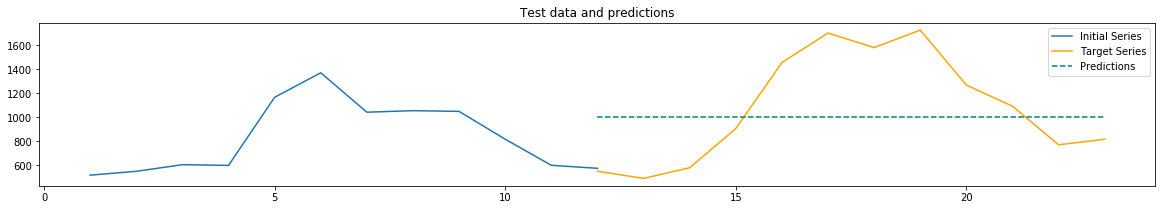

In [257]:
model.plot_time_series_predictions(test_X, test_y, y_preds, test_dates)

# LSTM

In [250]:
network2 = model.make_network_for_timeseries(train_X, train_y, 40, 2000, cell1 = LSTM)

Epoch 1/2000
9321/9321 [==============================] - 2s 233us/step - loss: 1157560.6970
Epoch 2/2000
9321/9321 [==============================] - 1s 142us/step - loss: 1154602.8278
Epoch 3/2000
9321/9321 [==============================] - 1s 143us/step - loss: 1152386.7703
Epoch 4/2000
9321/9321 [==============================] - 1s 129us/step - loss: 1149670.7206
Epoch 5/2000
9321/9321 [==============================] - 1s 126us/step - loss: 1147031.0797
Epoch 6/2000
9321/9321 [==============================] - 1s 152us/step - loss: 1144514.5930
Epoch 7/2000
9321/9321 [==============================] - 1s 139us/step - loss: 1142048.7931
Epoch 8/2000
9321/9321 [==============================] - 1s 129us/step - loss: 1139611.2879
Epoch 9/2000
9321/9321 [==============================] - 1s 119us/step - loss: 1137193.1007
Epoch 10/2000
9321/9321 [==============================] - 1s 140us/step - loss: 1134791.8073
Epoch 11/2000
9321/9321 [==============================] - 1s 124us/s

9321/9321 [==============================] - 1s 120us/step - loss: 777196.6027
Epoch 176/2000
9321/9321 [==============================] - 1s 129us/step - loss: 775290.3529
Epoch 177/2000
9321/9321 [==============================] - 1s 124us/step - loss: 773386.4671
Epoch 178/2000
9321/9321 [==============================] - 1s 154us/step - loss: 771485.5573
Epoch 179/2000
9321/9321 [==============================] - 1s 153us/step - loss: 769587.7051
Epoch 180/2000
9321/9321 [==============================] - 1s 127us/step - loss: 767691.8760
Epoch 181/2000
9321/9321 [==============================] - 1s 117us/step - loss: 765800.7111
Epoch 182/2000
9321/9321 [==============================] - 1s 111us/step - loss: 763914.0443
Epoch 183/2000
9321/9321 [==============================] - 1s 115us/step - loss: 762026.8065
Epoch 184/2000
9321/9321 [==============================] - 1s 112us/step - loss: 760144.2705
Epoch 185/2000
9321/9321 [==============================] - 1s 112us/step -

9321/9321 [==============================] - 1s 97us/step - loss: 485859.9036
Epoch 349/2000
9321/9321 [==============================] - 1s 96us/step - loss: 484365.8394
Epoch 350/2000
9321/9321 [==============================] - 1s 96us/step - loss: 482876.3726
Epoch 351/2000
9321/9321 [==============================] - 1s 97us/step - loss: 481386.2236
Epoch 352/2000
9321/9321 [==============================] - 1s 97us/step - loss: 479905.9586
Epoch 353/2000
9321/9321 [==============================] - 1s 95us/step - loss: 478419.0532
Epoch 354/2000
9321/9321 [==============================] - 1s 96us/step - loss: 476938.4270
Epoch 355/2000
9321/9321 [==============================] - 1s 96us/step - loss: 475453.7497
Epoch 356/2000
9321/9321 [==============================] - 1s 97us/step - loss: 473962.6881
Epoch 357/2000
9321/9321 [==============================] - 1s 96us/step - loss: 472500.2867
Epoch 358/2000
9321/9321 [==============================] - 1s 99us/step - loss: 4710

9321/9321 [==============================] - 1s 96us/step - loss: 254408.8404
Epoch 525/2000
9321/9321 [==============================] - 1s 97us/step - loss: 253439.5610
Epoch 526/2000
9321/9321 [==============================] - 1s 97us/step - loss: 252483.8065
Epoch 527/2000
9321/9321 [==============================] - 1s 98us/step - loss: 251458.1889
Epoch 528/2000
9321/9321 [==============================] - 1s 97us/step - loss: 250509.3173
Epoch 529/2000
9321/9321 [==============================] - 1s 98us/step - loss: 249576.1908
Epoch 530/2000
9321/9321 [==============================] - 1s 101us/step - loss: 248577.2611
Epoch 531/2000
9321/9321 [==============================] - 1s 98us/step - loss: 247629.0612
Epoch 532/2000
9321/9321 [==============================] - 1s 96us/step - loss: 246660.5478
Epoch 533/2000
9321/9321 [==============================] - 1s 97us/step - loss: 245719.2921
Epoch 534/2000
9321/9321 [==============================] - 1s 97us/step - loss: 244

9321/9321 [==============================] - 1s 99us/step - loss: 180575.8857
Epoch 613/2000
9321/9321 [==============================] - 1s 96us/step - loss: 179798.9488
Epoch 614/2000
9321/9321 [==============================] - 1s 100us/step - loss: 179340.2468
Epoch 615/2000
9321/9321 [==============================] - 1s 96us/step - loss: 178598.8497
Epoch 616/2000
9321/9321 [==============================] - 1s 97us/step - loss: 178121.2043
Epoch 617/2000
9321/9321 [==============================] - 1s 97us/step - loss: 177141.0896
Epoch 618/2000
9321/9321 [==============================] - 1s 96us/step - loss: 176389.1384
Epoch 619/2000
9321/9321 [==============================] - 1s 96us/step - loss: 175700.4068
Epoch 620/2000
9321/9321 [==============================] - 1s 96us/step - loss: 174996.1376
Epoch 621/2000
9321/9321 [==============================] - 1s 96us/step - loss: 174326.2654
Epoch 622/2000
9321/9321 [==============================] - 1s 97us/step - loss: 173

9321/9321 [==============================] - 1s 96us/step - loss: 92763.4169
Epoch 788/2000
9321/9321 [==============================] - 1s 97us/step - loss: 92366.7223
Epoch 789/2000
9321/9321 [==============================] - 1s 98us/step - loss: 92019.7787
Epoch 790/2000
9321/9321 [==============================] - 1s 96us/step - loss: 91611.3348
Epoch 791/2000
9321/9321 [==============================] - 1s 96us/step - loss: 91263.8693
Epoch 792/2000
9321/9321 [==============================] - 1s 96us/step - loss: 91196.5627
Epoch 793/2000
9321/9321 [==============================] - 1s 96us/step - loss: 90691.0378
Epoch 794/2000
9321/9321 [==============================] - 1s 96us/step - loss: 90301.3935
Epoch 795/2000
9321/9321 [==============================] - 1s 97us/step - loss: 90201.0383
Epoch 796/2000
9321/9321 [==============================] - 1s 96us/step - loss: 89833.8038
Epoch 797/2000
9321/9321 [==============================] - 1s 97us/step - loss: 89438.8880
Epo

9321/9321 [==============================] - 1s 95us/step - loss: 53726.7784
Epoch 965/2000
9321/9321 [==============================] - 1s 96us/step - loss: 53798.6402
Epoch 966/2000
9321/9321 [==============================] - 1s 95us/step - loss: 53475.7659
Epoch 967/2000
9321/9321 [==============================] - 1s 96us/step - loss: 53377.8283
Epoch 968/2000
9321/9321 [==============================] - 1s 96us/step - loss: 53155.5721
Epoch 969/2000
9321/9321 [==============================] - 1s 96us/step - loss: 53052.8356
Epoch 970/2000
9321/9321 [==============================] - 1s 97us/step - loss: 53043.8225
Epoch 971/2000
9321/9321 [==============================] - 1s 96us/step - loss: 52882.6811
Epoch 972/2000
9321/9321 [==============================] - 1s 96us/step - loss: 52577.8109
Epoch 973/2000
9321/9321 [==============================] - 1s 97us/step - loss: 52503.7000
Epoch 974/2000
9321/9321 [==============================] - 1s 97us/step - loss: 52386.2978
Epo

9321/9321 [==============================] - 1s 96us/step - loss: 39799.3889
Epoch 1140/2000
9321/9321 [==============================] - 1s 97us/step - loss: 39811.5520
Epoch 1141/2000
9321/9321 [==============================] - 1s 96us/step - loss: 39811.9473
Epoch 1142/2000
9321/9321 [==============================] - 1s 96us/step - loss: 39736.4982
Epoch 1143/2000
9321/9321 [==============================] - 1s 96us/step - loss: 39142.5427
Epoch 1144/2000
9321/9321 [==============================] - 1s 97us/step - loss: 39307.9165
Epoch 1145/2000
9321/9321 [==============================] - 1s 96us/step - loss: 38959.9092
Epoch 1146/2000
9321/9321 [==============================] - 1s 96us/step - loss: 39195.4895
Epoch 1147/2000
9321/9321 [==============================] - 1s 96us/step - loss: 39334.7226
Epoch 1148/2000
9321/9321 [==============================] - 1s 96us/step - loss: 38856.4587
Epoch 1149/2000
9321/9321 [==============================] - 1s 109us/step - loss: 390

9321/9321 [==============================] - 1s 92us/step - loss: 35825.6810
Epoch 1315/2000
9321/9321 [==============================] - 1s 91us/step - loss: 35751.0485
Epoch 1316/2000
9321/9321 [==============================] - 1s 91us/step - loss: 36118.3357
Epoch 1317/2000
9321/9321 [==============================] - 1s 90us/step - loss: 35539.0073
Epoch 1318/2000
9321/9321 [==============================] - 1s 92us/step - loss: 35576.7167
Epoch 1319/2000
9321/9321 [==============================] - 1s 91us/step - loss: 35430.6876
Epoch 1320/2000
9321/9321 [==============================] - 1s 91us/step - loss: 36231.2702
Epoch 1321/2000
9321/9321 [==============================] - 1s 89us/step - loss: 35815.3624
Epoch 1322/2000
9321/9321 [==============================] - 1s 92us/step - loss: 35832.6761
Epoch 1323/2000
9321/9321 [==============================] - 1s 91us/step - loss: 35375.4880
Epoch 1324/2000
9321/9321 [==============================] - 1s 92us/step - loss: 3585

Epoch 1490/2000
9321/9321 [==============================] - 1s 96us/step - loss: 34533.0892
Epoch 1491/2000
9321/9321 [==============================] - 1s 97us/step - loss: 33723.0764
Epoch 1492/2000
9321/9321 [==============================] - 1s 96us/step - loss: 33833.1470
Epoch 1493/2000
9321/9321 [==============================] - 1s 98us/step - loss: 33678.7369
Epoch 1494/2000
9321/9321 [==============================] - 1s 97us/step - loss: 34149.3914
Epoch 1495/2000
9321/9321 [==============================] - 1s 96us/step - loss: 33957.8167
Epoch 1496/2000
9321/9321 [==============================] - 1s 95us/step - loss: 34456.7994
Epoch 1497/2000
9321/9321 [==============================] - 1s 98us/step - loss: 34079.2396
Epoch 1498/2000
9321/9321 [==============================] - 1s 96us/step - loss: 34165.3783
Epoch 1499/2000
9321/9321 [==============================] - 1s 96us/step - loss: 33735.5804
Epoch 1500/2000
9321/9321 [==============================] - 1s 96us/s

9321/9321 [==============================] - 1s 91us/step - loss: 34767.0428
Epoch 1665/2000
9321/9321 [==============================] - 1s 102us/step - loss: 34769.5341
Epoch 1666/2000
9321/9321 [==============================] - 1s 107us/step - loss: 34563.9831
Epoch 1667/2000
9321/9321 [==============================] - 1s 102us/step - loss: 35244.1005
Epoch 1668/2000
9321/9321 [==============================] - 1s 107us/step - loss: 34979.5987
Epoch 1669/2000
9321/9321 [==============================] - 1s 104us/step - loss: 35450.8631
Epoch 1670/2000
9321/9321 [==============================] - 1s 98us/step - loss: 34962.6747
Epoch 1671/2000
9321/9321 [==============================] - 1s 96us/step - loss: 34508.3281
Epoch 1672/2000
9321/9321 [==============================] - 1s 97us/step - loss: 35326.5654
Epoch 1673/2000
9321/9321 [==============================] - 1s 99us/step - loss: 35072.4192
Epoch 1674/2000
9321/9321 [==============================] - 1s 93us/step - loss:

9321/9321 [==============================] - 1s 91us/step - loss: 34352.4311
Epoch 1753/2000
9321/9321 [==============================] - 1s 91us/step - loss: 34373.4568
Epoch 1754/2000
9321/9321 [==============================] - 1s 90us/step - loss: 33888.6274
Epoch 1755/2000
9321/9321 [==============================] - 1s 91us/step - loss: 33552.6882
Epoch 1756/2000
9321/9321 [==============================] - 1s 91us/step - loss: 34011.8905
Epoch 1757/2000
9321/9321 [==============================] - 1s 91us/step - loss: 33807.8712
Epoch 1758/2000
9321/9321 [==============================] - 1s 92us/step - loss: 33773.7152
Epoch 1759/2000
9321/9321 [==============================] - 1s 90us/step - loss: 34324.1105
Epoch 1760/2000
9321/9321 [==============================] - 1s 97us/step - loss: 33570.0218
Epoch 1761/2000
9321/9321 [==============================] - 1s 91us/step - loss: 33418.0016
Epoch 1762/2000
9321/9321 [==============================] - 1s 91us/step - loss: 3340

9321/9321 [==============================] - 1s 90us/step - loss: 34984.5532
Epoch 1929/2000
9321/9321 [==============================] - 1s 91us/step - loss: 35255.6643
Epoch 1930/2000
9321/9321 [==============================] - 1s 91us/step - loss: 35097.7590
Epoch 1931/2000
9321/9321 [==============================] - 1s 91us/step - loss: 35614.1485
Epoch 1932/2000
9321/9321 [==============================] - 1s 91us/step - loss: 34680.0966
Epoch 1933/2000
9321/9321 [==============================] - 1s 90us/step - loss: 35568.1544
Epoch 1934/2000
9321/9321 [==============================] - 1s 92us/step - loss: 35396.2846
Epoch 1935/2000
9321/9321 [==============================] - 1s 91us/step - loss: 35384.0039
Epoch 1936/2000
9321/9321 [==============================] - 1s 92us/step - loss: 35574.4424
Epoch 1937/2000
9321/9321 [==============================] - 1s 91us/step - loss: 36686.7065
Epoch 1938/2000
9321/9321 [==============================] - 1s 91us/step - loss: 3526

In [253]:
y_preds = model.predict_time_series(network2, test_X, test_y)

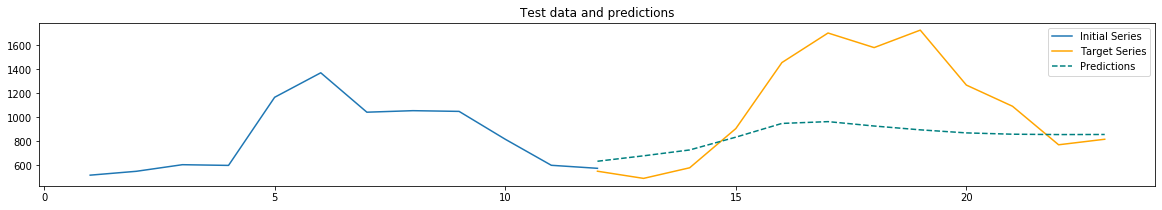

In [254]:
model.plot_time_series_predictions(test_X, test_y, y_preds, test_dates)